In [1]:
import numpy as np
import tensorflow as tf

In [2]:

from tensorflow.examples.tutorials.mnist import input_data #mnist es para referencias el metodo que usaremos para importar nuestras imagenes de la base de datos de esta misma para nuestra practica
mnist = input_data.read_data_sets('MNIST_data', one_hot=True) #aqui se mandan a llamar los datos 

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt 
import time

### Los Ejemplos de entrenamiento están en: 
# mnist.train.images
print("Número de ejemplos de entrenamiento:", mnist.train.images.shape[0])

### El conjunto de validacion es: 
# mnist.validation
print("Número de ejemplos de validación:", mnist.validation.images.shape[0])


### El conjunto de prueba es: 
# mnist.test
print("Número de ejemplos de prueba:", mnist.test.images.shape[0])


### Cada dígito es un vector de dimensión 784 .
print("Tamaño de cada dígito:", mnist.train.images.shape[1])


### Las etiquetas se encuentran en: 
# mnist.train.labels
# mnist.validation.labels
# mnist.test.labels

print("Tamaño de cada etiqueta:", mnist.train.labels.shape[1])
#Cada etiqueta es un one-hot-vector,ie. un vector con un solo uno, las demás entradas son cero
#[1,0,0,0,0,0,0,0,0,0]  representa el número 0
#[0,1,0,0,0,0,0,0,0,0]  representa el número 1
#   .
#   .
#   .

Número de ejemplos de entrenamiento: 55000
Número de ejemplos de validación: 5000
Número de ejemplos de prueba: 10000
Tamaño de cada dígito: 784
Tamaño de cada etiqueta: 10


In [4]:
#Cada dígito se almacena como un vector de 784 dimensiones. Para visualizarlo, primero lo redimensionamos a una imagen de 28x28.
def muestra_digito(x):
    """
        x: vector 
            784 dimensiones
        Muestra el vector como una imágen de 28x28
    """
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

def vis_imagen(i, conjunto="train"):
    """
        i indice del conjunto especificado
        conjunto: cadena
            Cualquiera: train, validation, test
            
        Muestra el dígito en el indice i  y su etiqueta
    """
    if(conjunto=="train"): 
        muestra_digito(mnist.train.images[i,])
        label = np.argwhere(mnist.train.labels[i])[0][0]
    elif(conjunto=="test"): 
        muestra_digito(mnist.test.images[i,])
        label = np.argwhere(mnist.test.labels[i])[0][0]
    else:
        muestra_digito(mnist.validation.images[i,])
        label = np.argwhere(mnist.validation.labels[i])[0][0]
    print("Etiqueta " + str(label))
    return

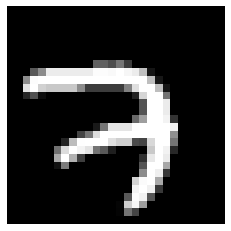

Etiqueta 7


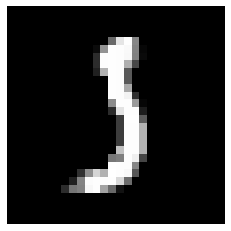

Etiqueta 5


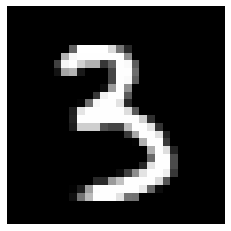

Etiqueta 3


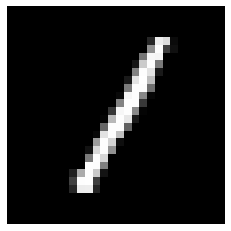

Etiqueta 1


In [5]:

vis_imagen(0, conjunto="train")
vis_imagen(132, conjunto="validation")
vis_imagen(32, conjunto="test")
vis_imagen(50000, conjunto="train")

In [6]:

x = tf.placeholder(tf.float32, shape=[None, 784]) #correspondiente a las imagenes y el tamaño de estas mismas
y = tf.placeholder(tf.float32, shape=[None, 10]) #correspondiente a los labels

In [7]:
### Capa 1
W_1 = tf.Variable(tf.truncated_normal(shape = [784,512], stddev=0.2)) #los 784 pertenecen al tama;o de nuestro vector de imagenes y el 512 el numero de unidades de nuestra red, nunca iniciar la de peso W con zero.
b_1 = tf.Variable(tf.zeros([512]))

### Capa 2 de salida
W_2 = tf.Variable(tf.truncated_normal(shape = [512,10], stddev=0.2))
b_2 = tf.Variable(tf.zeros([10]))
 ##En caso de agregar otra capa , los valores en la parte del shape tienen que coincidir principalmente el ultimo de la anterior "512", tiene que coincidir con el primero de la nueva capa "512", por otro lado en la ultima parte de la capa va nuestra ultima salida en este caso el 10, ya que tiene que coincidir con la dimensionalidad que establecio en los labels "y",

In [8]:
def NN(x):
    """
        x: matriz
            su forma  debe ser (m, 784)
            
        regresa la activación de la capa de salida
        matriz de (m, 10)
    """
    # Capa Escondida 1. 
    z_1 = tf.matmul(x,W_1) + b_1 ### Combinación lineal
    a_1  = tf.nn.relu(z_1)     ### Activación (función no lineal)
    
    # Capa 2. Está es la capa de salida
    z_2 = tf.matmul(a_1,W_2) + b_2 ### Combinación lineal
    
   
    #igual aqui se repetiria el mismo procedimiento de agregar una nueva capa 
    return z_2

In [9]:
y_ = NN(x)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_, labels = y)) #aqui en esta capa se reciben las predicciones de nuestro modelo, y esta sera nuestra funcion de costos

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
train_pred = tf.nn.softmax(y_) # predicciones en el conjunto de entrenamiento
### Nota: la función softmax calcula la probabilidad de cada etiqueta del 0 al 9.
#Para obtener la predicción necesitamos usar las función tf.argmax(y_,1) o su versión en python np.argmax(y_,1)
#Así se elige el dígito más probable para la imágen
#Esto lo hace la función precision

y_valid = NN(mnist.validation.images)
valid_pred = tf.nn.softmax(y_valid) # predicciones en el conjunto de validación

In [11]:
opt = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy) #esto sera nuestro optimizador que sera empleado para disminuir el numero de errores al momento del entrenamiento el conocido learning rate

In [12]:
sess = tf.Session() #Crea una sessión
sess.run(tf.global_variables_initializer())

In [13]:
### Precisión
def precision(predicciones, etiquetas):
    return (100.0 * np.sum(np.argmax(predicciones, 1) == np.argmax(etiquetas, 1))
          / predicciones.shape[0])

In [14]:
%%time 

pasos = 5000

print("Entrenamiento:")
for i in range(pasos):
    batch = mnist.train.next_batch(100)
    _,costo,predicciones =  sess.run([opt, cross_entropy, train_pred],  feed_dict={x: batch[0], y: batch[1]})
    
    if (i % 500 == 0):
        print("Costo del minibatch hasta el paso %d: %f" % (i, costo))
        print("Precisión en el conjunto de entrenamiento: %.1f%%" % precision(predicciones, batch[1]))
        print("Precision en el conjunto de validación: %.1f%%" % precision(
        valid_pred.eval(session=sess), mnist.validation.labels))
        print("\n")

Entrenamiento:
Costo del minibatch hasta el paso 0: 5.654846
Precisión en el conjunto de entrenamiento: 15.0%
Precision en el conjunto de validación: 35.2%


Costo del minibatch hasta el paso 500: 0.118802
Precisión en el conjunto de entrenamiento: 99.0%
Precision en el conjunto de validación: 95.7%


Costo del minibatch hasta el paso 1000: 0.037296
Precisión en el conjunto de entrenamiento: 100.0%
Precision en el conjunto de validación: 96.9%


Costo del minibatch hasta el paso 1500: 0.033395
Precisión en el conjunto de entrenamiento: 99.0%
Precision en el conjunto de validación: 97.4%


Costo del minibatch hasta el paso 2000: 0.118039
Precisión en el conjunto de entrenamiento: 96.0%
Precision en el conjunto de validación: 97.1%


Costo del minibatch hasta el paso 2500: 0.025312
Precisión en el conjunto de entrenamiento: 99.0%
Precision en el conjunto de validación: 97.8%


Costo del minibatch hasta el paso 3000: 0.014632
Precisión en el conjunto de entrenamiento: 100.0%
Precision en 

In [15]:

y_test = NN(mnist.test.images)
test_prediction = tf.nn.softmax(y_test)
print("Precisión en el conjunto de PRUEBA: %.1f%%" % precision(test_prediction.eval(session = sess), mnist.test.labels))

Precisión en el conjunto de PRUEBA: 97.8%


Predicción: 1


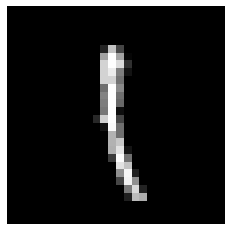

Etiqueta 1


In [28]:
indice = 251
p = tf.argmax(NN(mnist.test.images[indice:indice+1]).eval(session = sess),1)
print("Predicción:", sess.run(p)[0])
vis_imagen(indice, conjunto="test")

In [33]:
def remove_transparency(im, bg_colour=(255, 255, 255)):

    # Only process if image has transparency 
    if im.mode in ('RGBA', 'LA') or (im.mode == 'P' and 'transparency' in im.info):

        # Need to convert to RGBA if LA format due to a bug in PIL 
        alpha = im.convert('RGBA').split()[-1]

        # Create a new background image of our matt color.
        # Must be RGBA because paste requires both images have the same format

        bg = Image.new("RGBA", im.size, bg_colour + (255,))
        bg.paste(im, mask=alpha)
        return bg

    else:
        return im

In [45]:
from PIL import Image
imagen = "o.png"
img = Image.open('o.png')
img = remove_transparency(img).convert('L')

if  img.size != (28,28):
    img.thumbnail((28,28), Image.ANTIALIAS)

entrada = np.array(img, dtype = np.float32)
entrada = entrada.reshape((1,784))
entrada = entrada/255.0
        
p = tf.argmax(NN(entrada).eval(session = sess),1)
print("Imágen:{}".format(imagen))
img.show()
print("Predicción:", sess.run(p)[0])

Imágen:o.png
Predicción: 5
